<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 45px; font-weight: bold; text-decoration: underline;">
   AIDS Classification
</div>

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 40px; font-weight: bold; text-decoration: underline;">
   Table of Content
</div>

1) Import Libraries: pandas, numpy, matplot, seaborn.

2) Load the CSV Data: Read the data from the CSV file.

3) Data Exploration: Display basic statistics and explore the dataset.

4) Data Visualization: Create visualizations to understand the distribution of various features.

5) Modeling: Train a classification model to predict whether a patient is infected or not.

6) Evaluation: Assess the performance of the model.

7) Graphs: Bar plot and Scatter plot.

8) Confusion Matrix

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Importing Libraries
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Load the CSV Data
</div>

In [2]:
df = pd.read_csv('C:/Users/Dell/OneDrive/Documents/python intern/AIDS_Classification.csv')
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [3]:
print(df.head())

   time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...     0   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...     1   
2   961    3   45  88.4520     0     1      1      90       0    1  ...     1   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...     1   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...     1   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0      1        0      1       0   422    477   566    324         0  
1      3        0      1       0   162    218   392    564         1  
2      3        0      1       1   326    274  2063   1893         0  
3      3        0      1       0   287    394  1590    966         0  
4      3        0      0       0   504    353   870    782         0  

[5 rows x 23 columns]


<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Display basic statistics
</div>

In [4]:
print(df.describe())

              time          trt          age         wtkg         hemo  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177     1.520804    35.248247    75.125311     0.084151   
std     292.274324     1.127890     8.709026    13.263164     0.277680   
min      14.000000     0.000000    12.000000    31.000000     0.000000   
25%     727.000000     1.000000    29.000000    66.679200     0.000000   
50%     997.000000     2.000000    34.000000    74.390400     0.000000   
75%    1091.000000     3.000000    40.000000    82.555200     0.000000   
max    1231.000000     3.000000    70.000000   159.939360     1.000000   

              homo        drugs       karnof       oprior          z30  ...  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  ...   
mean      0.661057     0.131370    95.446470     0.021973     0.550257  ...   
std       0.473461     0.337883     5.900985     0.146629     0.497584  ...   
min       0.00000

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Display information
</div>

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Check for missing values
</div>

In [6]:
print(df.isnull().sum())

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Set the style for seaborn
</div>

In [7]:
sns.set(style="whitegrid")

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Plot the distribution of ages
</div>

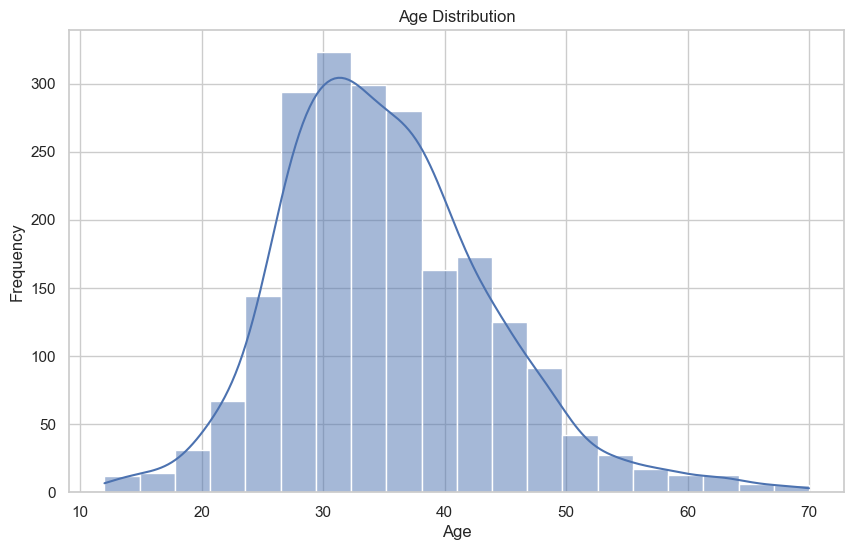

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Plot the distribution of weight
</div>

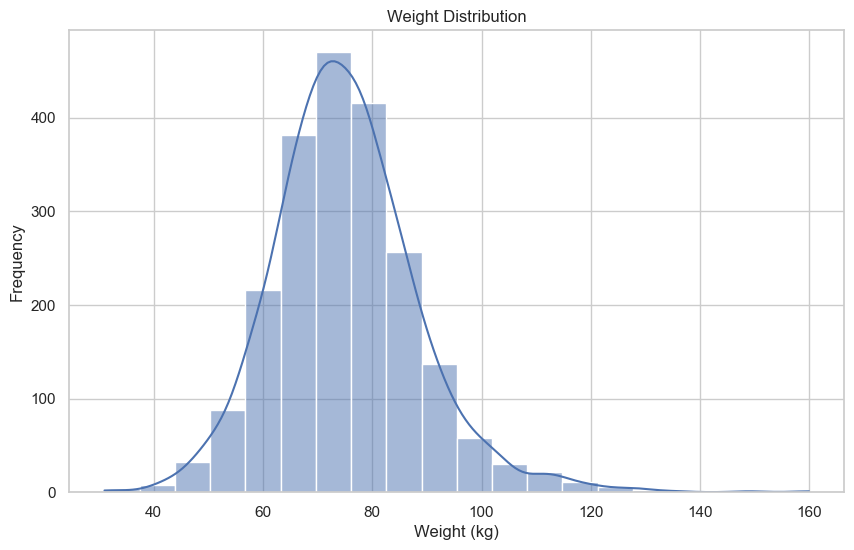

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['wtkg'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Define features and target variable
</div>

In [10]:
X = df[['age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender']]
y = df['infected']

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Split the data into training and testing sets
</div>

In [11]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.3, random_state=42)

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Create and train the model
</div>

In [12]:
model = LOR(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Make predictions
</div>

In [13]:
y_pred = model.predict(X_test)

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Evaluate the model
</div>

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[482   4]
 [152   4]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       486
           1       0.50      0.03      0.05       156

    accuracy                           0.76       642
   macro avg       0.63      0.51      0.45       642
weighted avg       0.70      0.76      0.66       642



<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Bar plot for count of infected vs non-infected
</div>

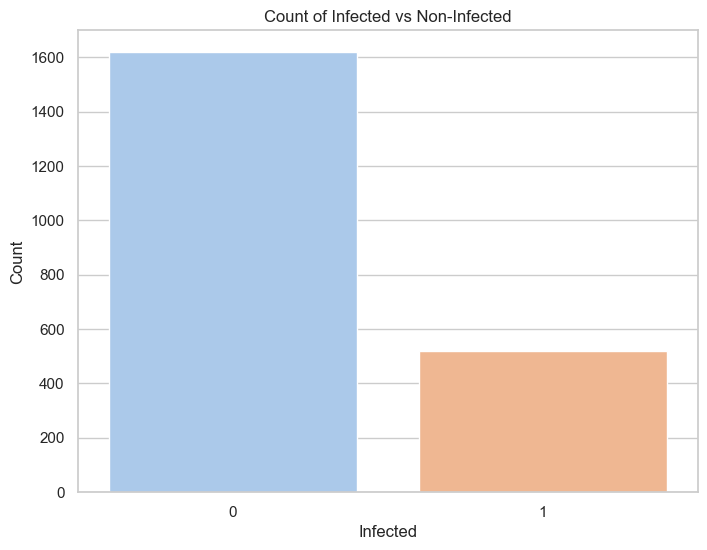

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='infected', data=df, palette='pastel')
plt.title('Count of Infected vs Non-Infected')
plt.xlabel('Infected')
plt.ylabel('Count')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Scatter plot for age vs weight
</div>

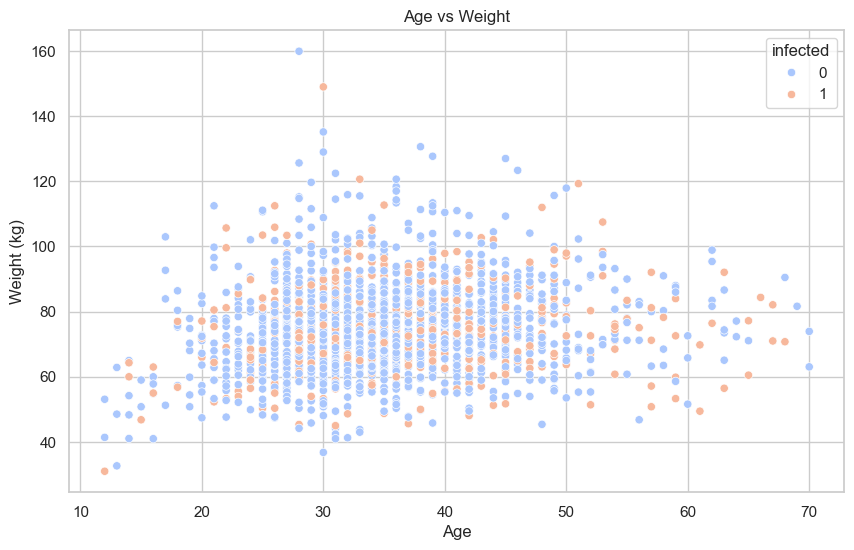

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='wtkg', hue='infected', data=df, palette='coolwarm')
plt.title('Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Histogram of age
</div>

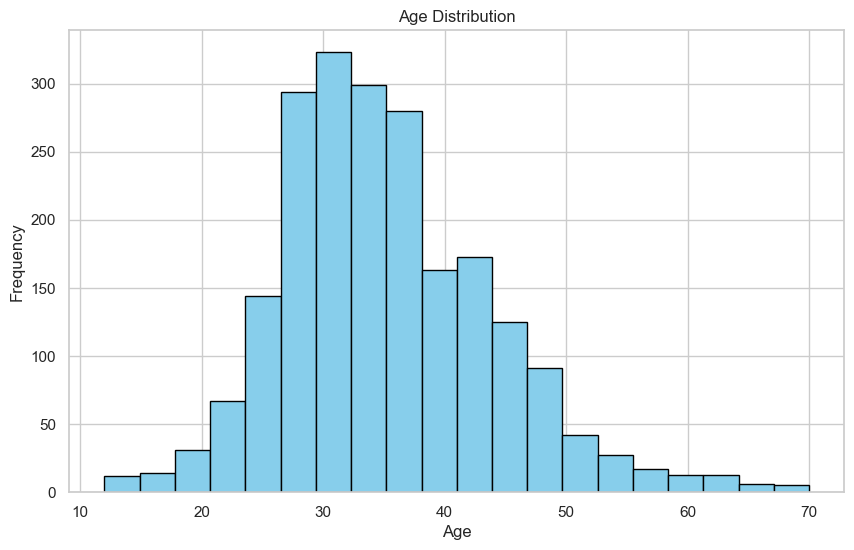

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Histogram of weight
</div>

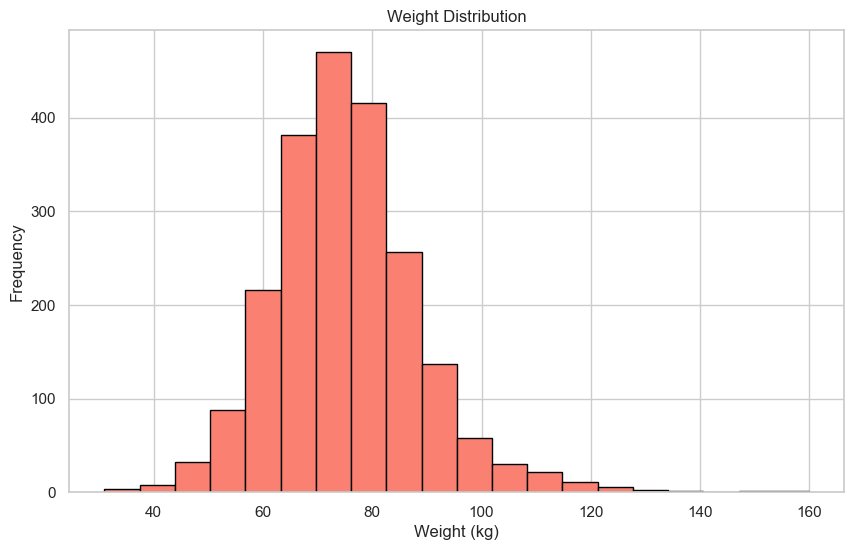

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['wtkg'], bins=20, color='salmon', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Pie chart of infected vs non-infected
</div>

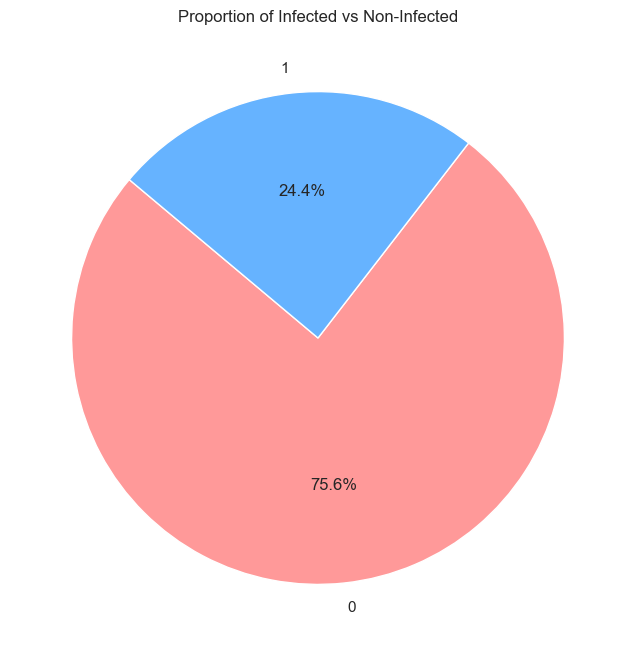

In [19]:
labels = df['infected'].value_counts().index
sizes = df['infected'].value_counts().values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Proportion of Infected vs Non-Infected')
plt.show()

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Generate the confusion matrix
</div>

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Create a ConfusionMatrixDisplay object
</div>

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Infected', 'Infected'])

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Plot the confusion matrix
</div>

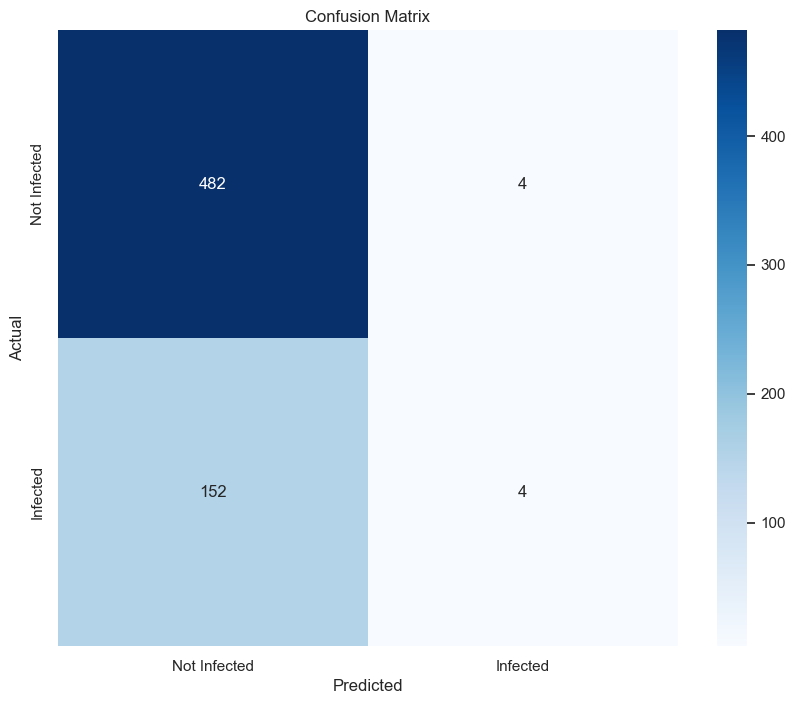

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Infected", "Infected"],
            yticklabels=["Not Infected", "Infected"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()